# Surf's Up!  Assignment
## Includes: Flask/API code from Hawaii_app.py and db_prepare.py (SQLalchemy boilerplate)
###   -produced by Verna Orsatti August 5, 2018



In [1]:
%matplotlib notebook
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight') 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector

In [11]:
# Rename Base to schema
schema = Base
schema.classes.items()

[('measurement', sqlalchemy.ext.automap.measurement),
 ('station', sqlalchemy.ext.automap.station)]

In [12]:
# Use inspector to view table details
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print( table_name,": ", column.get('name'), ", ", column.get('type'))

measurement :  id ,  INTEGER
measurement :  station ,  TEXT
measurement :  date ,  TEXT
measurement :  prcp ,  FLOAT
measurement :  tobs ,  FLOAT
station :  id ,  INTEGER
station :  station ,  TEXT
station :  name ,  TEXT
station :  latitude ,  FLOAT
station :  longitude ,  FLOAT
station :  elevation ,  FLOAT


# Precipitation Analysis

In [13]:
# Design a query to retrieve the last 12 months of precipitation 
# data and plot the results
# There are multiple stations per date: Yes

In [14]:
# Calculate the date 1 year ago from today
most_recent_date = session.query(Measurement.date)\
    .order_by(Measurement.date.desc()).first()
most_recent_date 

('2017-08-23')

In [15]:
# Reduce most recent date of data collected, reduced by 1 year for query for 365 days
rec_date = str(most_recent_date)[2:-3]
year_ago = str(eval(rec_date[0:4])-1) + rec_date[4:]
year_ago

'2016-08-23'

In [16]:
# View Test information from Measurement
# An average of the Station's precipitation measurment is used for this analysis as it made more analysis sense.
#   The original requirements were for querying precipitation amounts, without mention of average
test_precip_twelve = session.query(Measurement.date,
                                   func.avg(Measurement.prcp))\
    .filter(Measurement.date > year_ago)\
    .group_by(Measurement.date)\
    .order_by(Measurement.date).all()
    
for row in test_precip_twelve:
    print(row)

('2016-08-24', 1.5549999999999997)
('2016-08-25', 0.07714285714285715)
('2016-08-26', 0.016666666666666666)
('2016-08-27', 0.06399999999999999)
('2016-08-28', 0.5166666666666666)
('2016-08-29', 0.24333333333333332)
('2016-08-30', 0.011666666666666667)
('2016-08-31', 0.6359999999999999)
('2016-09-01', 0.006)
('2016-09-02', 0.05)
('2016-09-03', 0.254)
('2016-09-04', 0.276)
('2016-09-05', 0.08499999999999999)
('2016-09-06', 0.246)
('2016-09-07', 0.3333333333333333)
('2016-09-08', 0.07666666666666667)
('2016-09-09', 0.17833333333333332)
('2016-09-10', 0.27999999999999997)
('2016-09-11', 0.25)
('2016-09-12', 0.308)
('2016-09-13', 0.45166666666666666)
('2016-09-14', 2.3800000000000003)
('2016-09-15', 0.8266666666666667)
('2016-09-16', 0.11714285714285715)
('2016-09-17', 0.13599999999999998)
('2016-09-18', 0.10600000000000001)
('2016-09-19', 0.064)
('2016-09-20', 0.14714285714285716)
('2016-09-21', 0.19499999999999998)
('2016-09-22', 0.2057142857142857)
('2016-09-23', 0.22428571428571428)
('2

In [17]:
# Create dataframe in the rough and sort by date for graph
precip_df = pd.DataFrame(test_precip_twelve, columns=['date','prcp'])
precip_df['date'] = pd.to_datetime(precip_df['date'], format='%Y/%m/%d')
precip_df.sort_values(by=['date'])
precip_df.head()

,date,prcp
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


In [18]:
# Reset index to Date and drop dates with no measurements taken for precipitation.
# This Dataframe is just for the graff of precipation amounts recorded.  
precip_df.set_index('date', inplace=True)
precip_df.dropna(inplace=True)
precip_df.head()

,prcp
date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667


<IPython.core.display.Javascript object>


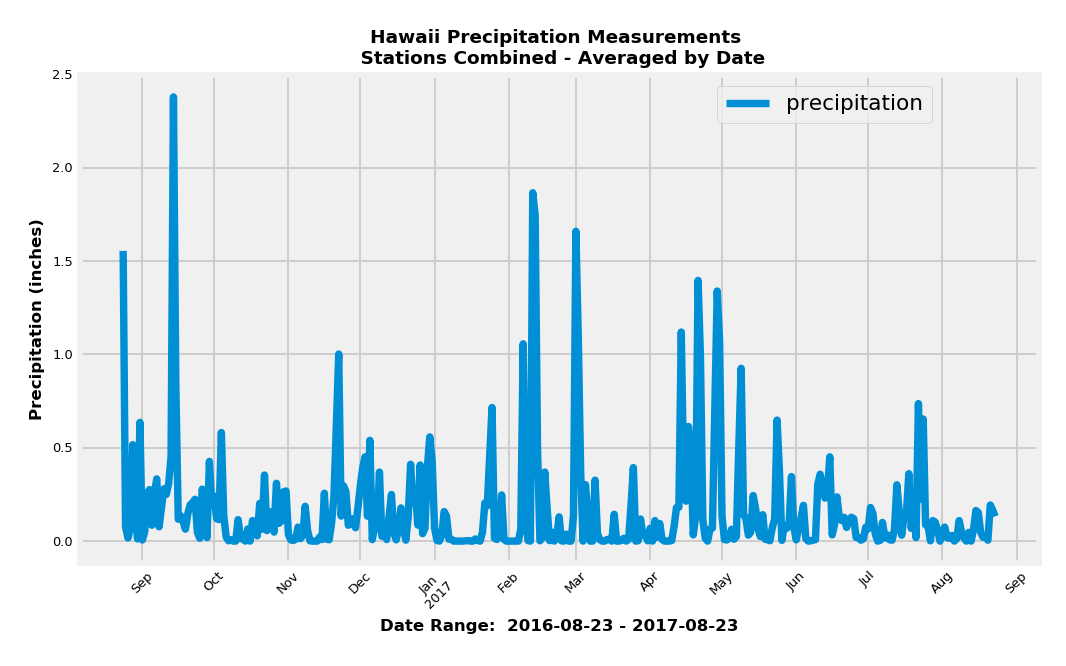

In [35]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(use_index=True, y='prcp', figsize=(8,5))
plt.gcf().subplots_adjust(bottom=0.15)
plt.title("Hawaii Precipitation Measurements \n Stations Combined - Averaged by Date", fontweight='bold',size=10)
plt.xlabel(f"Date Range:  {year_ago} - {rec_date}", fontweight='bold', size=9)
plt.ylabel("Precipitation (inches)", fontweight='bold', size=9)
plt.yticks(size=7)
plt.xticks(rotation=45, size=7)
plt.legend(["precipitation"],loc=1, fontsize='small', bbox_to_anchor=(.90, 1))
plt.tight_layout()
plt.savefig('precipitation_amounts.png')
plt.show()

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Station Analysis

In [21]:
# Use inspector to view table details
for table_name in inspector.get_table_names():
    for column in inspector.get_columns(table_name):
        print( table_name,": ", column.get('name'), ", ", column.get('type'))

measurement :  id ,  INTEGER
measurement :  station ,  TEXT
measurement :  date ,  TEXT
measurement :  prcp ,  FLOAT
measurement :  tobs ,  FLOAT
station :  id ,  INTEGER
station :  station ,  TEXT
station :  name ,  TEXT
station :  latitude ,  FLOAT
station :  longitude ,  FLOAT
station :  elevation ,  FLOAT


In [22]:
# How many stations are available in this dataset?
station_list = session.query(Station.id,Station.station,Station.name)
print(f"There are {station_list.count()} stations in the dataset")

There are 9 stations in the dataset


In [23]:
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc())
for row in station_activity:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [24]:
# What are the most active stations? 
highest_station_activity = session.query(Measurement.station,
                  func.count(Measurement.station))\
.group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).limit(1).scalar()
print(f"The station with the hightest number of observations is {highest_station_activity}. ")

The station with the hightest number of observations is USC00519281. 


In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
#    highest temperature recorded, and average temperature most active station?

q = session.query(Station.id,
                  Station.name,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
.filter(Measurement.station == Station.station)\
.filter(Measurement.station == "USC00519281")
avg_tmp_rec = "{0:.1f}".format(q[0][4])
print(f"Most Active Station ID: {q[0][0]}, \
    Name: {highest_station_activity},\
    Location: {q[0][1]} \nResults: \n    Minimum temperature recorded:  {q[0][2]}\n\
    Maximum temperture recorded :  {q[0][3]}\n    Average temperature recorded:  {avg_tmp_rec}")

Most Active Station ID: 7,     Name: USC00519281,    Location: WAIHEE 837.5, HI US 
Results: 
    Minimum temperature recorded:  54.0
    Maximum temperture recorded :  85.0
    Average temperature recorded:  71.7


In [26]:
# Choose the station with the highest number of temperature observations = (highest_station_activity)
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_twelve = session.query(Measurement.tobs)\
    .filter(Measurement.date > year_ago)\
    .filter(Measurement.station == highest_station_activity)\
    .order_by(Measurement.tobs).all()
    
for row in tobs_twelve:
    print(row)

(59.0,)
(59.0,)
(59.0,)
(60.0,)
(60.0,)
(61.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(62.0,)
(63.0,)
(63.0,)
(63.0,)
(63.0,)
(64.0,)
(64.0,)
(64.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(65.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(66.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(67.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(68.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(69.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(70.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(71.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)
(72.0,)


In [27]:
tobs_df = pd.DataFrame(tobs_twelve, columns=['temp'])
tobs_df.head()

,temp
0,59.0
1,59.0
2,59.0
3,60.0
4,60.0


<IPython.core.display.Javascript object>


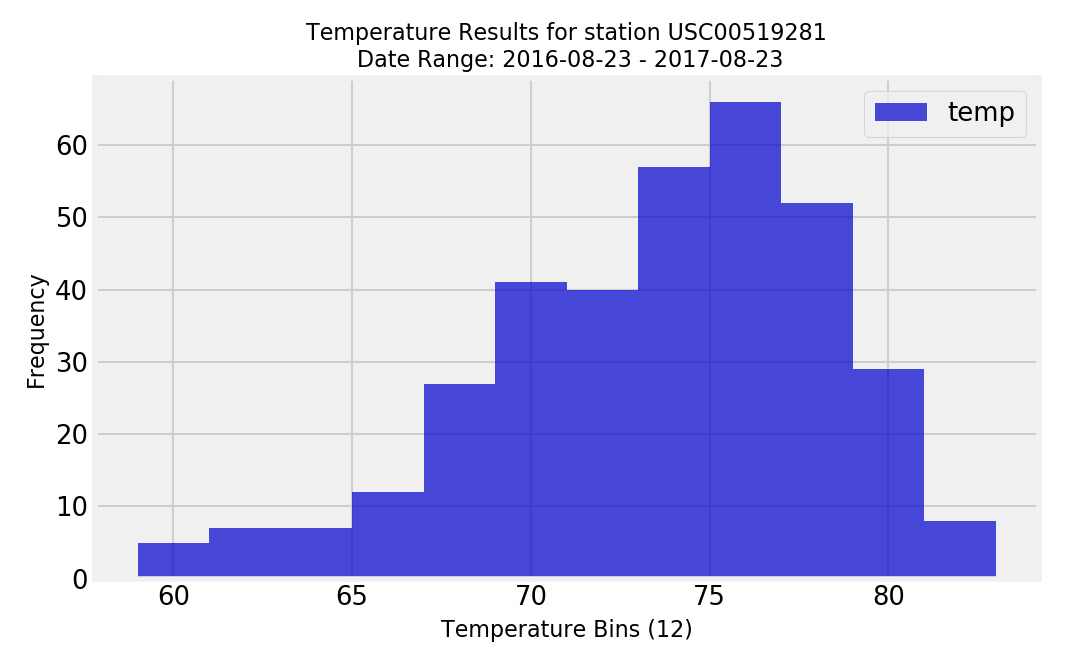

In [36]:
# Plot Temperature Results for Most Active Station
plt.subplots(figsize=(8,5))

plt.hist(tobs_df['temp'], bins=12, color="mediumblue", alpha=.7)
plt.title(f"Temperature Results for station {highest_station_activity}\n Date Range: \
{year_ago} - {rec_date}",fontsize=12)
plt.xlabel('Temperature Bins (12)', fontsize=12)
plt.ylabel("Frequency", fontsize=12)
labels = ['temp']
plt.legend(labels)
plt.gcf().subplots_adjust(bottom=0.15)
plt.tight_layout()
plt.savefig('temperature_results_hist.png')
plt.show()

# Temperature Analysis

### Modified Function (Def) to handle varied trip dates per query; accommodates for data updates.

In [29]:
# NEW CODE - Modified for variable trip dates and data updates


def calc_temps(trip_start_date, trip_end_date, most_recent_date):
    
    # Prepare date specifics  for selecting proper year for query
    m_yr = most_recent_date[0:4]
    m_md = str(most_recent_date[5:7]) + str(most_recent_date[8:10])
    if m_md[0:1] == "0":
        m_md = m_md[1:] # (MonthDay) eval will not work on a string starting with zero
        
    # Allow for updates to the data file to accomodate for same year conditions or older trip dates
    t_yr = trip_end_date[0:4]
    t_md = str(trip_end_date[5:7]) + str(trip_end_date[8:10])
    if t_md[0:1] == "0":
        t_md = t_md[1:]

    # Figure it out for the year adjustement     
    if (eval(t_yr) > eval(m_yr) and eval(m_md) >= eval(t_md)):
        yr_adjust = 0
    elif eval(t_yr) < eval(m_yr) and eval(t_md) <= eval(m_md):
        yr_adjust = 0
    else:
        yr_adjust = 1   
    
    # Build dates for past data per time frame - Get most recent year's data for the trip days
    #rec_date = str(most_recent_date)[2:-3]
    search_start_date = str(eval(most_recent_date[0:4])-yr_adjust) + trip_start_date[4:]
    search_end_date = str(eval(most_recent_date[0:4])-yr_adjust) + trip_end_date[4:]
    # existing code from supplied notebook: modified and cleaned up
    trip_stats = session.query(func.min(Measurement.tobs),
                               func.avg(Measurement.tobs),
                               func.max(Measurement.tobs))\
    .filter(Measurement.date >= search_start_date)\
    .filter(Measurement.date <= search_end_date).all()
    TMIN = trip_stats[0][0]
    TAVG = trip_stats[0][1]
    TMAX = trip_stats[0][2]
    
    return TMIN, TAVG, TMAX, search_start_date, search_end_date

In [30]:
# Calculate the date 1 year ago from today - re-posted here for reference
most_recent_date = session.query(Measurement.date)\
    .order_by(Measurement.date.desc()).first() 
most_recent_date = most_recent_date[0]

### Select your START and END dates for query and RE_RUN cell

In [31]:
# Hard code trip dates in lieu of webside request

# RE_RUN this cell with sample dates below.  TEST results will print below cell

# The function is written to work with updated data as well
# All queryies will return the most recent year's data for the month/day time period

# --Will use 2016 data because there is no data after 2017-08-23 at the time of this code
start_date = "2018-11-10"
end_date = "2018-11-24"

# --Will use 2017 data
# start_date = "2018-01-10"
# end_date = "2018-01-24"

# --Will use 2016 data because there is no data after 2017-08-23 at the time of this code
# start_date = "2017-12-01"
# end_date = "2017-12-15"

# --Will use 2016 data because there is no data after 2017-08-23 at the time of this code
# start_date = "2011-11-10"
# end_date = "2011-11-24"

# Process dates for appropriate year's data query
TMIN, TAVG, TMAX, search_sd, search_ed = calc_temps(start_date, end_date, most_recent_date)
tmp_avg = "{0:.1f}".format(TAVG)

# Print RESULTS:
print()
print(f"Most recent termperature data available is up until:\n  {most_recent_date}")
print()
print(f"Trip Start and End dates:\n  {start_date}\n  {end_date}")
print(f"Calculated Search Dates based on Trip Ending Date:\n  {search_sd}\n  {search_ed}")
print(f"RESULTS:\n  Temp Min: {TMIN}  Temp Avg: {tmp_avg}  Temp: {TMAX}")


Most recent termperature data available is up until:
  2017-08-23

Trip Start and End dates:
  2018-11-10
  2018-11-24
Calculated Search Dates based on Trip Ending Date:
  2016-11-10
  2016-11-24
RESULTS:
  Temp Min: 67.0  Temp Avg: 74.8  Temp: 80.0


<IPython.core.display.Javascript object>


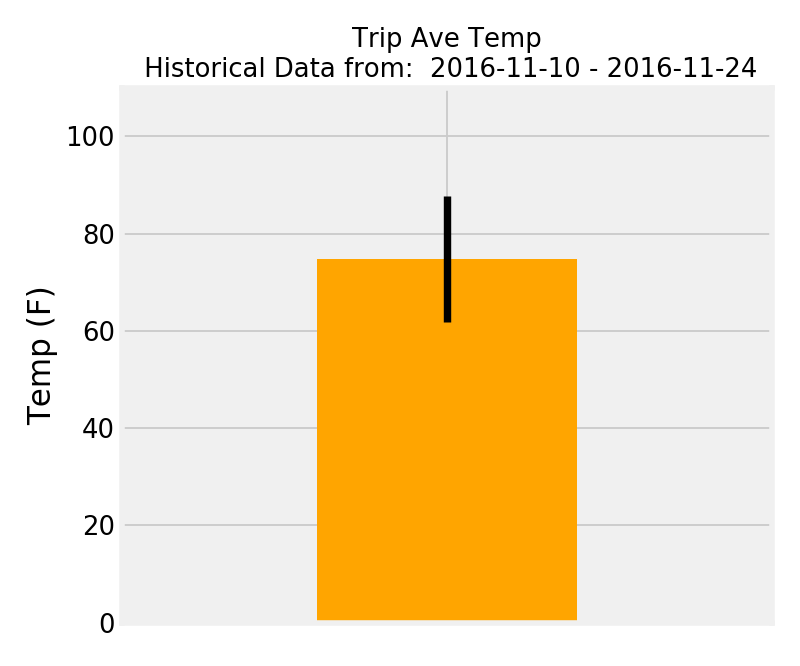

In [37]:
# Plot figure for Trip Ave Temp
plt.subplots(figsize=(6,5))
plt.xlim(0, 2)
plt.ylim([0,110])
plt.bar(1, TAVG, color = 'orange', yerr = TMAX-TMIN, tick_label="", align='center')
plt.title(f"Trip Ave Temp\n Historical Data from:  {search_sd} - {search_ed}", fontsize=14)
plt.ylabel("Temp (F)")
plt.tight_layout()

plt.show()
plt.savefig('trip_ave_temp.png')

In [33]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, 
# and elevation

q = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date >= search_sd)\
.filter(Measurement.date <= search_ed)\
.group_by(Station.station)\
.order_by(func.sum(Measurement.prcp).desc())

# A nice layout to read the results
print()
print (f"Historical Rainfall Per Weather Station - Descending order\n  Trip Dates: \
{start_date} - {end_date}\n  Most Recent Data Search Dates: {search_sd} - {search_ed}")
print()
for row in q:
    rain="{0:.2f}".format(row[1])
    print (f"Station:  {row[0]}\n    Rainfall:  {rain}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")
    print()       


Historical Rainfall Per Weather Station - Descending order
  Trip Dates: 2018-11-10 - 2018-11-24
  Most Recent Data Search Dates: 2016-11-10 - 2016-11-24

Station:  USC00516128
    Rainfall:  6.93  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station:  USC00519281
    Rainfall:  3.46  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station:  USC00519523
    Rainfall:  1.24  
    Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Elevation:  19.5      Latitude:  21.33556  Longitude:  -157.71139

Station:  USC00513117
    Rainfall:  1.12  
    Location:  KANEOHE 838.1, HI US
    Elevation:  14.6      Latitude:  21.4234  Longitude:  -157.8015

Station:  USC00519397
    Rainfall:  0.41  
    Location:  WAIKIKI 717.2, HI US
    Elevation:  3.0      Latitude:  21.2716  Longitude:  -157.8168

Station:  USC00514830
    Rainfall:  0.23  
    Location:  KUALOA

In [34]:
break

SyntaxError: 'break' outside loop (<ipython-input-34-6aaf1f276005>, line 1)

# STEP 2 - CLIMATE APP

In [ ]:
# Design a Flask API based on the queries that you have just developed.
#   USE Flask to create your routes

## Code from Hawaii_app.py and db_prepare.py 


In [ ]:
# Hawaii_app.py by Verna Orsatti
# Use in combination with db_prepare.py for boilerplate SQLalchemy 
from flask import Flask, json, jsonify
from db_prepare import engine, func, session, Measurement, Station

app = Flask(__name__)

# CLASSES
# measurement :  id ,  INTEGER
# measurement :  station ,  TEXT
# measurement :  date ,  TEXT
# measurement :  prcp ,  FLOAT
# measurement :  tobs ,  FLOAT
# station :  id ,  INTEGER
# station :  station ,  TEXT
# station :  name ,  TEXT
# station :  latitude ,  FLOAT
# station :  longitude ,  FLOAT
# station :  elevation ,  FLOAT

In [ ]:
@app.route('/')
def home_route():
    """ Available API Route Endpoints"""
    return (f"Enter Available Route Endpoints.  Where dates are required, modify date selection as desired: <br><br/>"
        f"1.   2017 dates & temps dictionary:   <br/>"
        f"   /api/v1.0/precipitation/ <br><br/>" 
        f"2.   JSON list of stations:    <br/>"
        f" /api/v1.0/stations/ <br><br/>" 
        f"3.    2017 JSON list of Temp Observations:  <br/>"
        f" /api/v1.0/tobs/ <br><br/>"
        f"For the following, enter date as form 'yyyy' or 'yyyy-mm' or 'yyyy-mm-dd' for BEST RESULTS! <br><br/>"
        f"4.    Stats Combined Stations. Enter Start date:  <br/>"
        f" /api/v1.0/2016-01-01/ <br><br/>" 
        f"5.    Stats Combined Stations. Enter Start & End Date:  <br/>"
        f" /api/v1.0/2016-01-01/2016-12-31/ <br><br/>"
        f"BONUS Options for the interested! <br><br/>"
        f"6.    Stats by Station,  Enter Start date:    <br/>"
        f"  /api/v1.0/station/2017-01-01/ <br><br/>" 
        f"7.    Stats by Station,  Enter Start & End date:   <br/>"
        f"   /api/v1.0/station/2016-01-01/2016-12-31/ <end>")
        

In [ ]:
#    Query Measurements for... All Stations
#    Dates and temperature observations from the last year.
#    Convert the query results to a Dictionary using 'date' as the key and 'tobs' as the value.
#    Return the JSON representation of your dictionary
@app.route('/api/v1.0/precipitation/')
def precipitation():
    prcp_results = session.query(Measurement.date, Measurement.tobs)\
    .filter(Measurement.date >= '2017-01-01').all()
    p_dict = dict(prcp_results)
    print()
    print("Results for Precipitation")
    return jsonify(p_dict) 

In [ ]:
#    Query Stations for.... Stations
#    Return a JSON-list of stations from the dataset.
@app.route('/api/v1.0/stations/')
def stations():
    station_list = session.query(Station.station)\
    .order_by(Station.station).all() 
    print()
    print("Station List:")   
    for row in station_list:
        print (row[0])
    return jsonify(station_list)

In [ ]:
#    Query Measurement for.... All stations
#    Return a JSON-list of Temperature Observations from the dataset.
@app.route('/api/v1.0/tobs/')
def tobs():
    temp_obs = session.query(Measurement.tobs)\
    .order_by(Measurement.date).all()
    print()
    print("Temperature Results for All Stations")
    return jsonify(temp_obs)

In [ ]:
# Query Measurements for.... Combined Stations
# Return a JSON-list of Temperature Observations from the previous year.
#   /api/v1.0/<start  and /api/v1.0/<start>/<end>
#   Return JSON list of temps: minimum, average, maxium as TMIN TAVG TMAX
#       FOR A GIVEN START DATE OR START END RANGE
@app.route('/api/v1.0/<start>/')
def combined_start_stats(start):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date >= start).all()                  
    print()
    print("Query Temps Combinded Stations with Start ({start}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

In [ ]:
# Query Measurements for.... Combined Stations
# Repeat of above stat request, but with end date added to decorator
@app.route('/api/v1.0/<start>/<end>/')
def combined_start_end_stats(start,end):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date <= end)\
                  .filter(Measurement.date >= start).all()
    print()
    print(f"Query Temps Combined Stations with Start ({start}) and End ({end}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

In [ ]:
# BONUS options for the interested!

#    Query Measurements for.... by Station
#    Return a JSON-list of Temperature Observations from the previous year.
#   /api/v1.0/<start  and /api/v1.0/<start>/<end>
#   Return JSON list of temps: minimum, average, maxium as TMIN TAVG TMAX
#       FOR A GIVEN START DATE OR START END RANGE
@app.route('/api/v1.0/station/<start>/')
def station_start_stats(start):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date >= start)\
                  .group_by(Station.station)\
                  .order_by(Station.id).all()
    print()
    print("Query Temps for Stations with Start ({start}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

In [ ]:
# Query Measurements for.... by Station
# Repeat of above stat request, but with end date added to decorator
@app.route('/api/v1.0/station/<start>/<end>/')
def station_start_end_stats(start,end):
    q = session.query(Station.id,
                  Station.station,
                  func.min(Measurement.tobs),
                  func.max(Measurement.tobs),
                  func.avg(Measurement.tobs))\
                  .filter(Measurement.station == Station.station)\
                  .filter(Measurement.date <= end)\
                  .filter(Measurement.date >= start)\
                  .group_by(Station.station)\
                  .order_by(Station.id).all()
    print()
    print(f"Query Temps for Stations with Start ({start}) and End ({end}) Date")
    for row in q:
        print()
        print(row)
    return jsonify(q)

In [ ]:
app.run(debug=True)

In [ ]:
## SQLalchemy Boilerplate:  db_prepare.py

In [ ]:
# db_prepare.py

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import inspect

engine = create_engine("sqlite:///Resources/hawaii.sqlite")
#engine = create_engine("sqlite:///../Resources/hawaii.sqlite")


# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station
session = Session(engine)

### It was real... it was fun... but not real fun" ~anonymous quote from the '70s